# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary


C:\Users\EvgenyGalimov\miniconda3\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
batch_size_train = 64  #64
batch_size_test = 64

# Create training, validation and test sets and dataloaders
def get_MNIST_data(transform,batch_size_train,batch_size_test):

    training_data_raw = datasets.MNIST(root="data", train=True, download=True, transform=transform)
    training_data, validation_data = torch.utils.data.random_split(training_data_raw, (50000, 10000))

    train_loader = DataLoader(training_data, batch_size=batch_size_train, shuffle=True)
    validation_loader = DataLoader(validation_data, batch_size=batch_size_train, shuffle=True)

    # Create test set and define test dataloader
    test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
    test_loader = DataLoader(test_data, batch_size=batch_size_test)
    
    return train_loader, validation_loader, test_loader

In [4]:
train_loader, validation_loader, test_loader = get_MNIST_data(transform,batch_size_train,batch_size_test)

print('Train loader')
print(len(train_loader))
print(train_loader.batch_size)
batch = next(iter(train_loader))
print(batch[0].shape)

print('                                             ')

print('Validation loader')
print(len(validation_loader))
print(validation_loader.batch_size)
batch2 = next(iter(validation_loader))
print(batch2[0].shape)

print('                                             ')

print('Test loader')
print(len(test_loader))
print(test_loader.batch_size)
batch3 = next(iter(test_loader))
print(batch3[0].shape)



Train loader
782
64
torch.Size([64, 1, 28, 28])
                                             
Validation loader
157
64
torch.Size([64, 1, 28, 28])
                                             
Test loader
157
64
torch.Size([64, 1, 28, 28])


C:\Users\EvgenyGalimov\miniconda3\envs\nlp\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

I used the following preprocessing steps:
1) converting image to tensor.
    This step is done using the torchvision.transforms.ToTensor() function. Images need to be converted to tensors so that we could train neural networks as they work with tensors.

2) normilising the image.
    This step is done using the torchvision.transforms.Normalize() function. For each channel of the image, this transformation will take each pixel, substract mean of the channel and divide it by std of the channel: output[channel] = (input[channel] - mean[channel]) / std[channel].
This will make all features to have a similar range so that the gradients don't go out of control

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


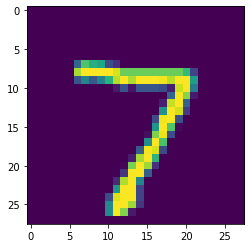

2


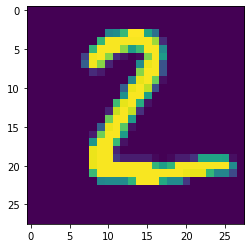

1


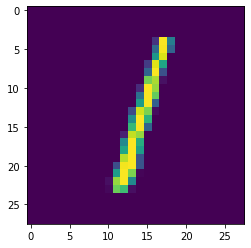

0


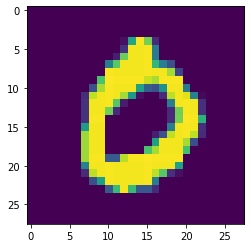

4


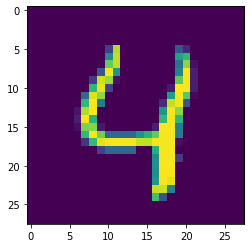

In [6]:
# Explore data trasformed to tensor
# images actually look the same as normalised
show5(DataLoader(datasets.MNIST(root="data", train=False, download=True, transform=transforms.ToTensor()), batch_size=32))

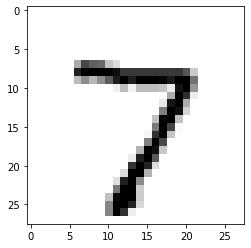

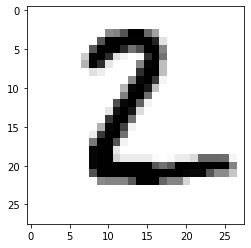

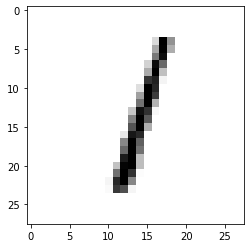

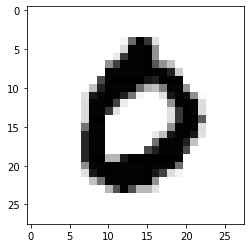

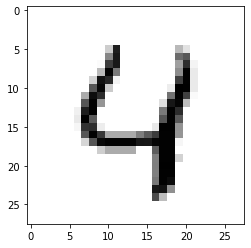

In [7]:
dataiter = next(iter(test_loader))
for i in range(0,5):
    plt.imshow(dataiter[0].numpy()[i].squeeze(), cmap='gray_r')
    plt.show()    

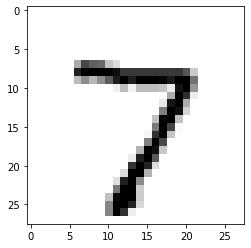

In [8]:
dataiter = next(iter(test_loader))
plt.imshow(dataiter[0].numpy()[0].squeeze(), cmap='gray_r')
plt.show()    

In [9]:
dataiter = next(iter(test_loader))
dataiter[0].numpy()[0].squeeze()

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
# Define the class for your neural network
class DeepNet_variable_hidden_layers(nn.Module):
    def __init__(self, input_layer_size, output_layer_size, hidden_layers_size_list):
            super(DeepNet_variable_hidden_layers, self).__init__()
            self.input_layer_size = input_layer_size
            self.output_layer_size = output_layer_size
            self.hidden_layers_size_list = hidden_layers_size_list
            self.activation_function = nn.ReLU()
            self.output_function = torch.nn.LogSoftmax(dim=1)
            # construct a deep net
            temp_layer_size = input_layer_size
            self.layers = nn.ModuleList()
            for hidden_layers_size in hidden_layers_size_list:
                self.layers.append(nn.Linear(temp_layer_size, hidden_layers_size))
                temp_layer_size = hidden_layers_size
            self.layers.append(nn.Linear(temp_layer_size, output_layer_size))
            
    def forward(self, x):
            x = torch.flatten(x, 1) # flatten all dimensions except batch
            for layer in self.layers[:-1]:
                x = self.activation_function(layer(x))
            x = self.output_function(self.layers[-1](x))
            return x    
  
# Net(input_layer_size, output_layer,_size, [list of hhidden layer sizes])
# Instantiate the model
model = DeepNet_variable_hidden_layers(784, 10, [100,200])

In [11]:
# see the keras like summary of the model

summary(model, (1,28,28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              ReLU-2                  [-1, 100]               0
            Linear-3                  [-1, 200]          20,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
        LogSoftmax-6                   [-1, 10]               0
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.38
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
# Define the training loop
def train_net(epoch, model, optimizer, criterion, train_loader, validation_loader, model_save_name):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, (data, target) in enumerate(train_loader):
        # data is a list of [inputs, labels]

        # Pass to GPU if available.
        if torch.cuda.is_available():
            data, target = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(output.data, 1)
        train_correct += (preds == target).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch} training accuracy: {100*train_correct/len(train_loader.dataset):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    
    val_loss = 0.0
    val_correct = 0
    model.eval()
    with torch.no_grad():
        for data2, target2 in validation_loader:
            if torch.cuda.is_available():
                data2, target2 = inputs.cuda(), labels.cuda()

            output2 = model(data2)
            loss = criterion(output2, target2)
            _2, preds2 = torch.max(output2.data, 1)
            val_correct += (preds2 == target2).sum().item()
            val_loss += loss.item()
        print(f'Epoch {epoch } validation accuracy: {100*val_correct/len(validation_loader.dataset):.2f}% validation loss: {val_loss/len(validation_loader.dataset):.5f}')
        val_loss_history.append(val_loss/len(validation_loader.dataset))
    torch.save(model.state_dict(), model_save_name)


# Define the test loop
def test_net(model, param_path, test_loader, criterion):
    if param_path != 'no_pretrained':
        model.load_state_dict(torch.load(param_path)) 
    test_loss = 0.0
    test_correct = 0
    model.eval()
    with torch.no_grad():
        for data3, target3 in test_loader:
            if torch.cuda.is_available():
                 data3, target3 = inputs.cuda(), labels.cuda()

            output3 = model(data3)
            loss3 = criterion(output3, target3)

            _3, preds3 = torch.max(output3.data, 1)
            test_correct += (preds3 == target3).sum().item()
            test_loss += loss3.item()
        print(f'test accuracy: {100*test_correct/len(test_loader.dataset):.2f}% validation loss: {test_loss/len(test_loader.dataset):.5f}')

### Tried the DNN with 3 layers: 100, 200, 10 units, optimiser - SGD, loss function - nll_loss

In [13]:
# set random seed
random_seed = 1
torch.manual_seed(random_seed)


torch.backends.cudnn.enabled = False

num_epochs = 4
batch_size_train = 64
batch_size_test = 64

# Initiate the model
model = DeepNet_variable_hidden_layers(784, 10, [100,200])
model_save_name = 'model1.pth'

learning_rate = 0.01
momentum = 0.5

# Define optimiser
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
# Define loss function
criterion = F.nll_loss

train_loss_history = list()
val_loss_history = list()

train_loader, validation_loader, test_loader = get_MNIST_data(transform,batch_size_train,batch_size_test)
print('Before training: ' )
test_net(model, 'no_pretrained', test_loader, criterion)
print('Training: ' )
for epoch in range(1, num_epochs + 1):
    train_net(epoch, model, optimizer, criterion, train_loader, validation_loader, model_save_name)
print('After training: ' )
test_net(model, 'model1.pth', test_loader, criterion)


Before training: 
test accuracy: 10.14% validation loss: 0.03629
Training: 
Epoch 1 training accuracy: 78.44% training loss: 0.76367
Epoch 1 validation accuracy: 89.07% validation loss: 0.00604
Epoch 2 training accuracy: 90.37% training loss: 0.32450
Epoch 2 validation accuracy: 90.51% validation loss: 0.00504
Epoch 3 training accuracy: 91.71% training loss: 0.27525
Epoch 3 validation accuracy: 91.49% validation loss: 0.00449
Epoch 4 training accuracy: 92.84% training loss: 0.23885
Epoch 4 validation accuracy: 92.07% validation loss: 0.00421
After training: 
test accuracy: 92.81% validation loss: 0.00364


Plot the training loss (and validation loss/accuracy, if recorded).

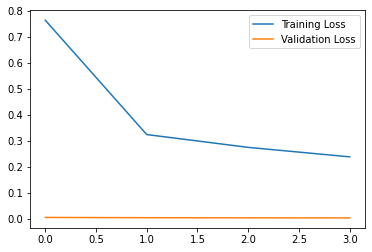

In [14]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
print('After training: ' )
test_net(model, 'model1.pth', test_loader, criterion)

After training: 
test accuracy: 92.81% validation loss: 0.00364


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

### Tried the same DNN with 3 layers: 100, 200, 10 units, but changed optimiser to Adam, loss function - nll_loss

In [16]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

num_epochs = 4
batch_size_train = 64
batch_size_test = 64

# added 3 more hidden layers -100, 50, 20
model = DeepNet_variable_hidden_layers(784, 10, [100,200])
model_save_name = 'model2.pth'

learning_rate = 0.01
momentum = 0.5

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

criterion = F.nll_loss

train_loss_history = list()
val_loss_history = list()

train_loader, validation_loader, test_loader = get_MNIST_data(transform,batch_size_train,batch_size_test)
print('Before training: ' )
test_net(model, 'no_pretrained', test_loader, criterion)
print('Training: ' )
for epoch in range(1, num_epochs + 1):
    train_net(epoch, model, optimizer, criterion, train_loader, validation_loader, model_save_name)
print('After training: ' )
test_net(model, 'model2.pth', test_loader, criterion)


Before training: 
test accuracy: 10.14% validation loss: 0.03629
Training: 
Epoch 1 training accuracy: 87.00% training loss: 0.41876
Epoch 1 validation accuracy: 90.11% validation loss: 0.00527
Epoch 2 training accuracy: 91.61% training loss: 0.29032
Epoch 2 validation accuracy: 90.96% validation loss: 0.00528
Epoch 3 training accuracy: 92.28% training loss: 0.26684
Epoch 3 validation accuracy: 91.62% validation loss: 0.00447
Epoch 4 training accuracy: 92.63% training loss: 0.26146
Epoch 4 validation accuracy: 92.15% validation loss: 0.00474
After training: 
test accuracy: 92.31% validation loss: 0.00434


### As Adam did not perform better, I tried a different DNN with 3 layers: 50, 200, 10 units, returned optimiser to SGD, loss function - nll_loss

In [17]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

num_epochs = 4
batch_size_train = 64
batch_size_test = 64

# changed the number of units in the first layer - 50
model = DeepNet_variable_hidden_layers(784, 10, [50,200])
model_save_name = 'model3.pth'

learning_rate = 0.01
momentum = 0.5

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

criterion = F.nll_loss

train_loss_history = list()
val_loss_history = list()

train_loader, validation_loader, test_loader = get_MNIST_data(transform,batch_size_train,batch_size_test)
print('Before training: ' )
test_net(model, 'no_pretrained', test_loader, criterion)
print('Training: ' )
for epoch in range(1, num_epochs + 1):
    train_net(epoch, model, optimizer, criterion, train_loader, validation_loader, model_save_name)
print('After training: ' )
test_net(model, 'model3.pth', test_loader, criterion)


Before training: 
test accuracy: 9.79% validation loss: 0.03633
Training: 
Epoch 1 training accuracy: 76.87% training loss: 0.78570
Epoch 1 validation accuracy: 88.77% validation loss: 0.00583
Epoch 2 training accuracy: 90.01% training loss: 0.33635
Epoch 2 validation accuracy: 90.36% validation loss: 0.00503
Epoch 3 training accuracy: 91.52% training loss: 0.28596
Epoch 3 validation accuracy: 91.98% validation loss: 0.00416
Epoch 4 training accuracy: 92.55% training loss: 0.24972
Epoch 4 validation accuracy: 93.16% validation loss: 0.00368
After training: 
test accuracy: 93.52% validation loss: 0.00350


## Saving your model
Using `torch.save`, save your model for future loading.
As the last model (model 3) performed best - accuarcy on test - 93.52%, I am saving it.

In [18]:
torch.save(model, "final_model.pt" ) 
torch.save(model.state_dict(), "final_model_params.pth" ) 